# Exercici 1: Classificació d'imatges amb Fashion MNIST

Donat el dataset FashionMNIST, definir una arquitectura, càrrega de dades i entrenament d'un algoritme de classificació amb deep learning per tal de classificar el dataset. 

Donar l'accuracy de l'algoritme sobre el conjunt de test i la matriu de confusió. Mostrar també l'evolució del loss d'entrenament i validació al llarg de les iteracions


In [16]:
import torch
import torchvision

fashion_data = torchvision.datasets.FashionMNIST('./fashion_data', download=True)
print(fashion_data)


100.0%

Extracting ./fashion_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashion_data/FashionMNIST/raw


111.0%

Extracting ./fashion_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashion_data/FashionMNIST/raw


100.0%

Extracting ./fashion_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashion_data/FashionMNIST/raw


159.1%

Extracting ./fashion_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashion_data/FashionMNIST/raw
Processing...
Done!
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./fashion_data
    Split: Train


# Exercici 2: Transformacions de dades

Aplicar diferents transformacions de dades a FashionMNIST per tal de millorar la generalització de l'arquitectura del problema anterior.

Donar l'accuracy de l'algoritme sobre el conjunt de test i la matriu de confusió. Mostrar també l'evolució del loss d'entrenament i validació al llarg de les iteracions





# Exercici 3: Kaggle Car Dataset [Opcional]

Trobar el model de cotxe en el Standford Car Dataset. El Dataset consisteix en 16000 imatges i 196 models possibles

https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder/download

Donar l'accuracy de l'algoritme sobre el conjunt de test i la matriu de confusió. Mostrar també l'evolució del loss d'entrenament i validació al llarg de les iteracions

Es recomana fer servir transfer learning per tal de millorar els resultats de classificació

NOTA: Cal descomprimir el fitxer stanford-car-dataset.zip en l'equip local el primer cop. Cal ajustar la variable per a que trobi el dataset

NOTA2: S'ha modificat el dataset per treballar amb imatges de mida 224x224 (la mida de les imatges ImageNET), per tal de poder treballar millor el transfer learning. També s'ha reduit el nombre de classes per tal de poder treballar amb les màquines del SOC


Total Number of Samples:  1630
Number of Samples in Train:  819
Number of Samples in Test:  811
Number of Classes:  20
 Sizes of Datasets:  811 819


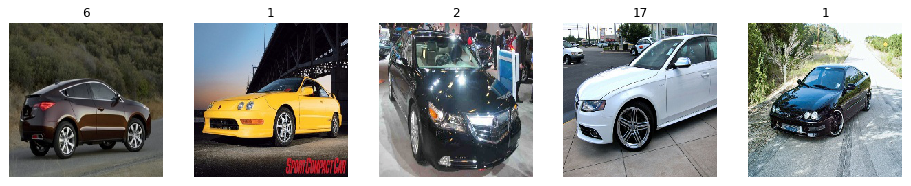

In [15]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os
import numpy as np
import matplotlib.pyplot as plt

dataset_dir = 'stanford-car-dataset-by-classes-folder/car_data/car_data/'
train_dir = os.path.join(dataset_dir,'train')
test_dir = os.path.join(dataset_dir,'test')

# transformacio standard ImageNet
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])


batch_size=12
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Loading datasets into dataloader 
dataloaders = {'train': DataLoader(train_dataset, batch_size = batch_size, shuffle = True),
               'test': DataLoader(test_dataset, batch_size = batch_size, shuffle = False)}

dataset_sizes = {'train': len(train_dataset),
                 'test': len(test_dataset)}

print("Total Number of Samples: ",len(train_dataset) + len(test_dataset))
print("Number of Samples in Train: ",len(train_dataset))
print("Number of Samples in Test: ",len(test_dataset))
print("Number of Classes: ",len(train_dataset.classes))

## Method to display Image for Tensor
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    return ax


print(" Sizes of Datasets: ", len(test_dataset), len(train_dataset))

# Displaying Training Images
images, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(figsize=(16,5), ncols=5)
for ii in range(5):
    ax = axes[ii]
    ax.set_title(labels[ii].item())
    imshow(images[ii], ax=ax, normalize=True)
    
